In [1]:
import sys
sys.path.append('../src/')

from class_wtt import TransformWTT
import utils
import image_experiments

import os
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_dirname = '../data'
data_filename = 'monochrome10.npz'

data = np.load(os.path.join(data_dirname, data_filename))
#data = dict((key, value) for key, value in data.items())

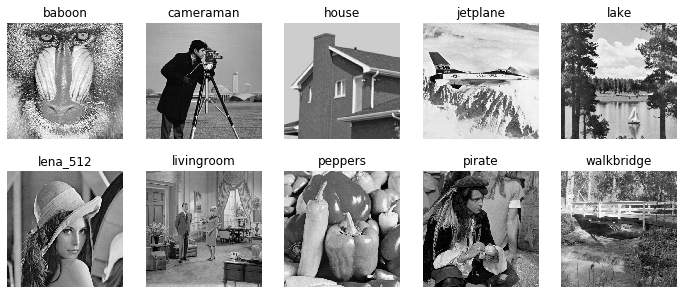

In [3]:
# plot dataset
nrows, ncols = 2, 5
fig, ax = plt.subplots(nrows, ncols, figsize=(12, 5))
cnt = 0
for x in data:
    i, j = cnt // ncols, cnt % ncols
    ax[i, j].imshow(data[x], cmap='gray')
    ax[i, j].set_title(x)
    ax[i, j].set_axis_off()
    cnt += 1
plt.show()

In [4]:
objects = list(data.keys())
dataset = np.array([data[x] for x in objects])
dataset = utils.direct_permute_batch_mode(dataset, 0)

In [5]:
# Experiments, block 1

# ranks = list(range(1, 16))
ranks = [12]
dacc = 5e-1
acc = np.arange(0., 100+dacc, dacc)

In [6]:
# experiment 1a: fixed train image
train_objects_1a = ['peppers']
test_objects_1a = ['lake', 'lena_512', 'livingroom', 'peppers', 'pirate', 'walkbridge']

result_cr_1a, result_psnr_1a = image_experiments.experiment1(
    dataset, objects, train_objects_1a, test_objects_1a, ranks, acc, eps=0., quant_par=2, nuind=0
)

In [7]:
result_cr_1a = np.squeeze(result_cr_1a)
result_psnr_1a = np.squeeze(result_psnr_1a)

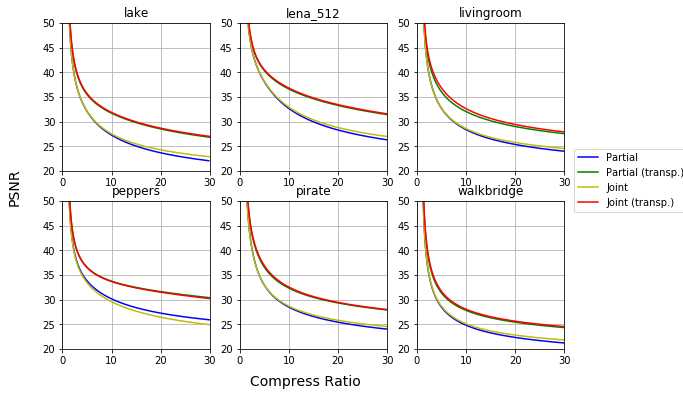

In [36]:
image_experiments.plot_results_exp1(test_objects_1a, result_cr_1a, result_psnr_1a, mode='a')
plt.savefig('ff_t.pgf', bbox_inches='tight')
plt.show()

In [10]:
# experiment 1b: fixed test image
train_objects_1b = ['baboon', 'cameraman', 'house', 'jetplane', 'lake', 'lena_512']
test_objects_1b = ['lena_512']

result_cr_1b, result_psnr_1b = image_experiments.experiment1(
    dataset, objects, train_objects_1b, test_objects_1b, ranks, acc, eps=0., quant_par=2, nuind=0
)

In [11]:
result_cr_1b = np.squeeze(result_cr_1b)
result_psnr_1b = np.squeeze(result_psnr_1b)

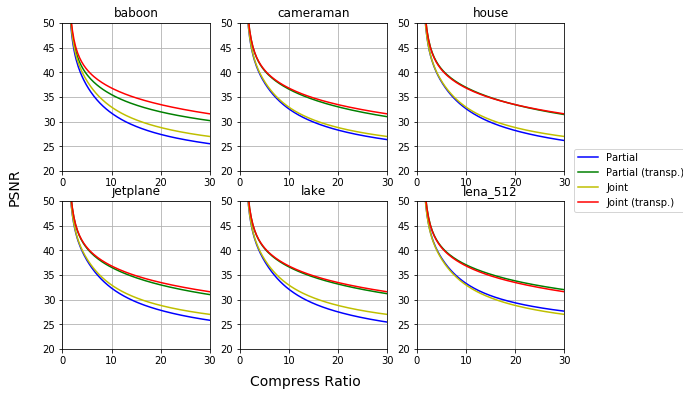

In [37]:
image_experiments.plot_results_exp1(train_objects_1b, result_cr_1b, result_psnr_1b, mode='b')
plt.savefig('f_ft.pgf', bbox_inches='tight')
plt.show()

In [5]:
# Experiments, block 2
psnr_value = 30.
ranks = list(range(1, 31))

In [6]:
# experiment 2a
train_objects_2a = ['lena_512']
test_objects_2a = ['baboon']

result_acc_2a, result_cr_2a = image_experiments.experiment2(
    dataset, objects, train_objects_2a, test_objects_2a, ranks, psnr_value, eps=0., quant_par=2, nuind=0
)

In [16]:
result_cr_2a = np.squeeze(result_cr_2a)

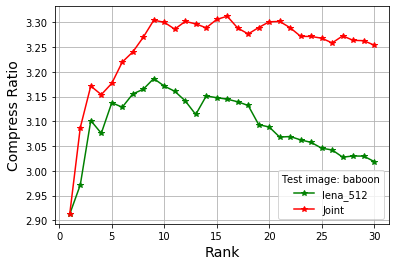

In [17]:
image_experiments.plot_results_exp2(ranks, result_cr_2a, train_objects_2a, test_objects_2a, z_order=1)
plt.savefig('ranks_nf_filt=5_test=0.pgf')
plt.show()

In [18]:
# experiment 2b
train_objects_2b = ['cameraman']
test_objects_2b = ['cameraman']

result_acc_2b, result_cr_2b = image_experiments.experiment2(
    dataset, objects, train_objects_2b, test_objects_2b, ranks, psnr_value, eps=0., quant_par=2, nuind=0
)

In [19]:
result_cr_2b = np.squeeze(result_cr_2b)

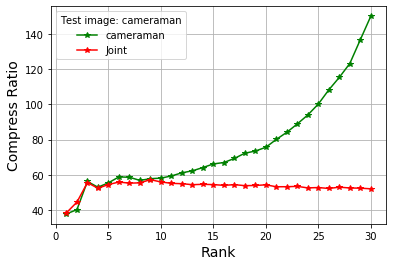

In [20]:
image_experiments.plot_results_exp2(ranks, result_cr_2b, train_objects_2b, test_objects_2b, z_order=1)
plt.savefig('ranks_nf_filt=1_test=1.pgf')
plt.show()

In [21]:
# experiment 2c
train_objects_2c = ['peppers']
test_objects_2c = ['cameraman']

result_acc_2c, result_cr_2c = image_experiments.experiment2(
    dataset, objects, train_objects_2c, test_objects_2c, ranks, psnr_value, eps=0., quant_par=2, nuind=0
)

In [22]:
result_cr_2c = np.squeeze(result_cr_2c)

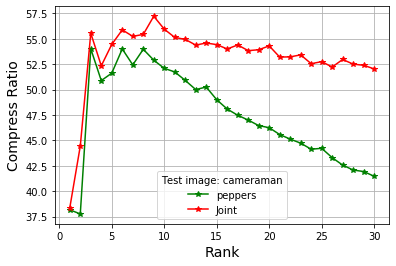

In [23]:
image_experiments.plot_results_exp2(ranks, result_cr_2c, train_objects_2c, test_objects_2c, z_order=1)
plt.savefig('ranks_nf_filt=7_test=1.pgf')
plt.show()

In [24]:
# experiment 2ar
train_objects_2ar = ['baboon']
test_objects_2ar = ['lena_512']

result_acc_2ar, result_cr_2ar = image_experiments.experiment2(
    dataset, objects, train_objects_2ar, test_objects_2ar, ranks, psnr_value,
    eps=0., quant_par=2, nuind=0
)

In [25]:
result_cr_2ar = np.squeeze(result_cr_2ar)

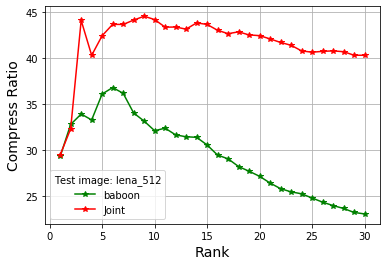

In [35]:
image_experiments.plot_results_exp2(
    ranks, result_cr_2ar, train_objects_2ar, test_objects_2ar, z_order=1
)
plt.savefig('ranks_nf_filt=0_test=5.pgf')
plt.show()

In [27]:
# experiment 2cr
train_objects_2cr = ['cameraman']
test_objects_2cr = ['peppers']

result_acc_2cr, result_cr_2cr = image_experiments.experiment2(
    dataset, objects, train_objects_2cr, test_objects_2cr, ranks, psnr_value,
    eps=0., quant_par=2, nuind=0
)

In [28]:
result_cr_2cr = np.squeeze(result_cr_2cr)

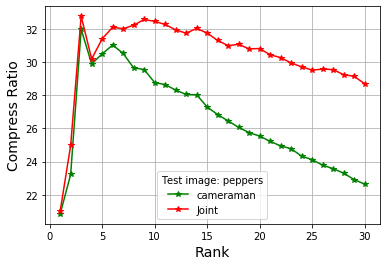

In [34]:
image_experiments.plot_results_exp2(
    ranks, result_cr_2cr, train_objects_2cr, test_objects_2cr, z_order=1
)
plt.savefig('ranks_nf_filt=1_test=7.pgf')
plt.show()

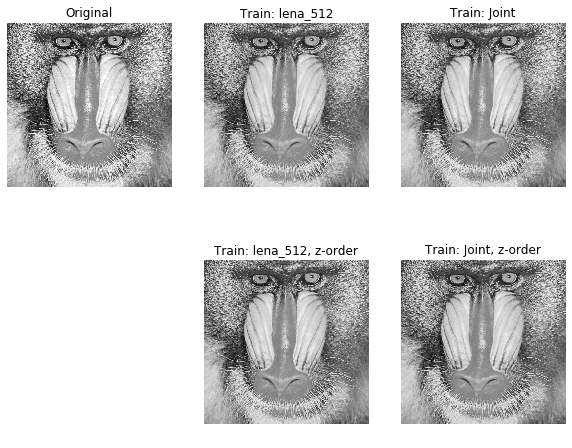

In [11]:
# PSNR 30 dB, recovering from compressed image

rank_pl = 12
test_num = 0
train_num = None
tmp_common_none = image_experiments.recover_compressed_dataset(
    dataset,
    rank=ranks[rank_pl-1],
    acc=result_acc_2a[0, 0, -1, rank_pl-1],
    train_num=train_num,
    test_num=test_num,
    quant_par=2,
    nuind=0,
    transp=None,
    eps=0.
)
tmp_common_z = image_experiments.recover_compressed_dataset(
    dataset,
    rank=ranks[rank_pl-1],
    acc=result_acc_2a[0, 0, -1, rank_pl-1],
    train_num=train_num,
    test_num=test_num,
    quant_par=2,
    nuind=0,
    transp='z',
    eps=0.
)
train_num = 5
tmp_lena_none = image_experiments.recover_compressed_dataset(
    dataset,
    rank=ranks[rank_pl-1],
    acc=result_acc_2a[0, 0, -1, rank_pl-1],
    train_num=train_num,
    test_num=test_num,
    quant_par=2,
    nuind=0,
    transp=None,
    eps=0.
)
tmp_lena_z = image_experiments.recover_compressed_dataset(
    dataset,
    rank=ranks[rank_pl-1],
    acc=result_acc_2a[0, 0, -1, rank_pl-1],
    train_num=train_num,
    test_num=test_num,
    quant_par=2,
    nuind=0,
    transp='z',
    eps=0.
)



nrows, ncols = 2, 3
fig, ax = plt.subplots(nrows, ncols, figsize=(10, 8))

ax[0, 0].imshow(dataset.T[test_num].T, cmap='gray')
ax[0, 0].set_title('Original')

ax[0, 1].imshow(tmp_lena_none, cmap='gray')
ax[0, 1].set_title('Train: lena_512')
ax[1, 1].imshow(tmp_lena_z, cmap='gray')
ax[1, 1].set_title('Train: lena_512, z-order')

ax[0, 2].imshow(tmp_common_none, cmap='gray')
ax[0, 2].set_title('Train: Joint')
ax[1, 2].imshow(tmp_common_z, cmap='gray')
ax[1, 2].set_title('Train: Joint, z-order')

for i in range(nrows):
    for j in range(ncols):
        ax[i, j].set_axis_off()
plt.show()

In [7]:
# just compressing images in npz

from PIL import Image
import os
import numpy as np

path = './data/'
fnms = os.listdir(path)
fnms = list(filter(lambda x: x.endswith('.tif'), fnms))
fnms.sort()
dataset = {}
for x in fnms:
    dataset[os.path.splitext(x)[0]] = Image.open(os.path.join(path, x))
np.savez_compressed(os.path.join(path, 'monochrome10.npz'), **dataset)
    